In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
from sklearn.cluster import KMeans

In [16]:
sensor=pd.read_csv("D:/sidang/ta/pollutant.csv")
sensor.head()

,index,sensor_A,sensor_B,sensor_C,sensor_D,sensor_E,sensor_F
0,625,88,21,17,36,25,69
1,626,88,21,17,36,25,69
2,627,87,21,17,36,25,69
3,628,87,21,17,36,25,69
4,629,83,21,17,36,24,69


In [17]:
sensor=sensor.drop(["index"],axis=1)
sensor

,sensor_A,sensor_B,sensor_C,sensor_D,sensor_E,sensor_F
0,88,21,17,36,25,69
1,88,21,17,36,25,69
2,87,21,17,36,25,69
3,87,21,17,36,25,69
4,83,21,17,36,24,69
...,...,...,...,...,...,...
2898,33,52,29,69,27,70
2899,32,52,28,69,26,69
2900,32,52,29,68,26,68
2901,32,55,32,68,28,67


In [18]:
sensor.shape

(2903, 6)

In [19]:
sensor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2903 entries, 0 to 2902
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   sensor_A  2903 non-null   int64
 1   sensor_B  2903 non-null   int64
 2   sensor_C  2903 non-null   int64
 3   sensor_D  2903 non-null   int64
 4   sensor_E  2903 non-null   int64
 5   sensor_F  2903 non-null   int64
dtypes: int64(6)
memory usage: 136.2 KB


In [20]:
sensor.describe()

,sensor_A,sensor_B,sensor_C,sensor_D,sensor_E,sensor_F
count,2903.000000,2903.000000,2903.000000,2903.000000,2903.000000,2903.000000
mean,50.445401,17.965208,12.382708,30.233896,15.451257,56.194626
std,7.955274,11.276114,5.619261,7.012448,3.915319,3.927190
min,29.000000,12.000000,9.000000,25.000000,9.000000,47.000000
25%,48.000000,13.000000,10.000000,28.000000,13.000000,55.000000
50%,52.000000,14.000000,10.000000,28.000000,15.000000,57.000000
75%,54.000000,16.000000,11.000000,29.000000,16.000000,57.000000
max,111.000000,74.000000,44.000000,72.000000,43.000000,78.000000


In [21]:
#atur data
x=sensor.iloc[:,0:6]
x.head()

,sensor_A,sensor_B,sensor_C,sensor_D,sensor_E,sensor_F
0,88,21,17,36,25,69
1,88,21,17,36,25,69
2,87,21,17,36,25,69
3,87,21,17,36,25,69
4,83,21,17,36,24,69


In [22]:
#ubah data ke array
x_array = np.array(x)
print(x_array)

[[88 21 17 36 25 69]
 [88 21 17 36 25 69]
 [87 21 17 36 25 69]
 ...
 [32 52 29 68 26 68]
 [32 55 32 68 28 67]
 [32 72 43 63 43 59]]


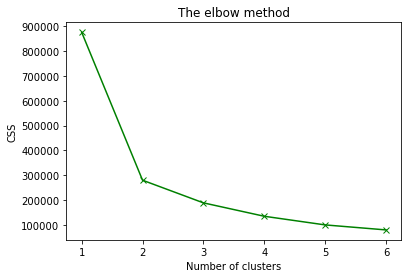

In [23]:
from sklearn.metrics import davies_bouldin_score
css=[]

#Menemukan inersia pada berbagai nilai k
for i in range(1,7):
    kmeans=KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 100, n_init = 10, random_state = 0).fit(x)
    css.append(kmeans.inertia_)
    
plt.plot(range(1, 7), css, 'bx-', color='green')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('CSS') 
plt.show()


In [24]:
#evalusi hasil k-means pakai DBI
from sklearn.metrics import davies_bouldin_score
results = {}

for i in range(2,11):
    kmeans = KMeans(n_clusters=i, random_state=30)
    labels = kmeans.fit_predict(x_array)
    db_index = davies_bouldin_score(x_array, labels)
    results.update({i: db_index})

In [25]:
#hasilnya
results

{2: 0.475081875872419,
 3: 0.5271314919239054,
 4: 0.6785979392169275,
 5: 0.5496610548094697,
 6: 0.6787295026414174,
 7: 0.7789631153107676,
 8: 0.8219974395402933,
 9: 0.8224977648186336,
 10: 0.840162826386123}

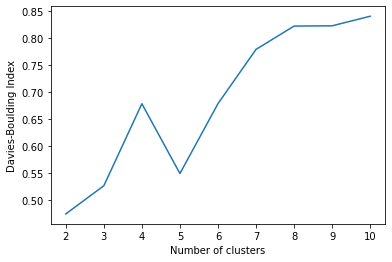

In [26]:
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Davies-Boulding Index")
plt.show()


In [27]:
#implementasi k-means
kmeans = KMeans(n_clusters=2, random_state = 0)
y_kmeans = kmeans.fit_predict(x_array)

In [28]:
kmeans.cluster_centers_

array([[33.99050633, 47.67405063, 26.7943038 , 46.86392405, 21.64556962,
        58.81012658],
       [52.45535369, 14.33629687, 10.62234248, 28.20255122, 14.69462698,
        55.87514496]])

In [29]:
print(kmeans.labels_)

[1 1 1 ... 0 0 0]


In [30]:
sensor["kluster"]=kmeans.labels_

In [32]:
sensor.to_csv("result-all-k2.csv")

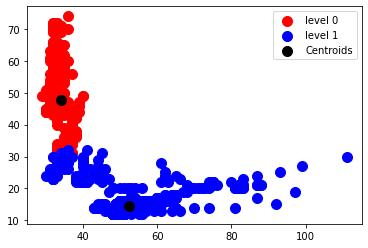

In [33]:
# Visualising the clusters - On the first two columns
plt.scatter(x_array[y_kmeans == 0, 0], x_array[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'level 0')
plt.scatter(x_array[y_kmeans == 1, 0], x_array[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'level 1')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')

plt.legend()
